<h1>1. Prepare environment</h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 - Import necessary packages

In [ ]:
!pip install pandarallel
!pip install imblearn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from datetime import datetime
from pandarallel import pandarallel
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from plotly.offline import iplot

 - Import .csv file

In [ ]:
hp = pd.read_csv('/content/drive/MyDrive/london_data.csv', encoding='ISO-8859-1')

 - Read first five records

In [ ]:
hp.head()

,Transaction ID,Price,Date,Postcode,Type,New,Duration,Address Line 1,Address Line 2,Street,Locality,Town/City,District,County,Record Status - current,Record Status - previous
0,{568DE11A-432B-4DA3-B9A4-83B4EC4BD127},121250,1995-05-19 00:00,N12 8LR,F,N,L,CAVENDISH HOUSE,FLAT 20,WOODSIDE GRANGE ROAD,LONDON,LONDON,BARNET,GREATER LONDON,A,A
1,{DED4E551-6B96-40FB-98E9-8AC3B9071356},128500,1995-03-01 00:00,SW18 5DH,T,N,F,149,NaN,TRENTHAM STREET,LONDON,LONDON,WANDSWORTH,GREATER LONDON,A,A
2,{8A5F7A96-0865-46E3-B3D9-91F47C16313A},157500,1995-03-17 00:00,N19 5EX,S,N,F,104,NaN,LADY MARGARET ROAD,LONDON,LONDON,ISLINGTON,GREATER LONDON,A,A
3,{60CF8CE4-7269-4F41-9062-91F4932AC4A2},110995,1995-11-09 00:00,SW8 2PH,F,Y,L,10,41,PRIORY GROVE,LONDON,LONDON,LAMBETH,GREATER LONDON,A,A
4,{8D28EE68-8F4F-4C7D-8A33-8E6335277383},180000,1995-11-16 00:00,NW8 9AA,F,N,L,7B,NaN,ABBEY ROAD,LONDON,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,A


- Describe main characteristics

In [ ]:
hp.describe()

,Price
count,3.737211e+06
mean,4.185848e+05
std,1.998351e+06
min,1.000000e+00
25%,1.475000e+05
50%,2.500000e+05
75%,4.300000e+05
max,5.943000e+08


- Describe 'Price' feature

In [ ]:
hp['Price'].describe()

,Price
count,3.737211e+06
mean,4.185848e+05
std,1.998351e+06
min,1.000000e+00
25%,1.475000e+05
50%,2.500000e+05
75%,4.300000e+05
max,5.943000e+08


- Display the value types for each column

In [ ]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737211 entries, 0 to 3737210
Data columns (total 16 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Transaction ID            object
 1   Price                     int64 
 2   Date                      object
 3   Postcode                  object
 4   Type                      object
 5   New                       object
 6   Duration                  object
 7   Address Line 1            object
 8   Address Line 2            object
 9   Street                    object
 10  Locality                  object
 11  Town/City                 object
 12  District                  object
 13  County                    object
 14  Record Status - current   object
 15  Record Status - previous  object
dtypes: int64(1), object(15)
memory usage: 456.2+ MB


Droping unwanted column

In [ ]:
hp.drop(columns=['Address Line 2', 'Locality'], inplace=True)


In [ ]:

hp.head()

,Transaction ID,Price,Date,Postcode,Type,New,Duration,Address Line 1,Street,Town/City,District,County,Record Status - current,Record Status - previous
0,{568DE11A-432B-4DA3-B9A4-83B4EC4BD127},121250,1995-05-19 00:00,N12 8LR,F,N,L,CAVENDISH HOUSE,WOODSIDE GRANGE ROAD,LONDON,BARNET,GREATER LONDON,A,A
1,{DED4E551-6B96-40FB-98E9-8AC3B9071356},128500,1995-03-01 00:00,SW18 5DH,T,N,F,149,TRENTHAM STREET,LONDON,WANDSWORTH,GREATER LONDON,A,A
2,{8A5F7A96-0865-46E3-B3D9-91F47C16313A},157500,1995-03-17 00:00,N19 5EX,S,N,F,104,LADY MARGARET ROAD,LONDON,ISLINGTON,GREATER LONDON,A,A
3,{60CF8CE4-7269-4F41-9062-91F4932AC4A2},110995,1995-11-09 00:00,SW8 2PH,F,Y,L,10,PRIORY GROVE,LONDON,LAMBETH,GREATER LONDON,A,A
4,{8D28EE68-8F4F-4C7D-8A33-8E6335277383},180000,1995-11-16 00:00,NW8 9AA,F,N,L,7B,ABBEY ROAD,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,A


- Number of records

In [ ]:
hp.count()

,0
Transaction ID,3737211
Price,3737211
Date,3737211
Postcode,3730702
Type,3737211
New,3737211
Duration,3737211
Address Line 1,3737160
Street,3734777
Town/City,3737211


- Print feature list

In [ ]:
feat_cols = hp.columns
feat_cols

Index(['Transaction ID', 'Price', 'Date', 'Postcode', 'Type', 'New',
       'Duration', 'Address Line 1', 'Street', 'Town/City', 'District',
       'County', 'Record Status - current', 'Record Status - previous'],
      dtype='object')

<h1>2. Data cleansing - PART 1</h1>

- Check the null existance

In [ ]:
hp.dropna(subset=['Postcode', 'Address Line 1', 'Street'], inplace=True)

In [ ]:
hp.isnull().sum()

,0
Transaction ID,0
Price,0
Date,0
Postcode,0
Type,0
New,0
Duration,0
Address Line 1,0
Street,0
Town/City,0


- Drop irrelevant features

In [ ]:
hp.drop(columns = 'Transaction ID', axis = 1, inplace = True)
hp.drop(columns = 'Duration', axis = 1, inplace = True)
# hp.drop(columns = 'Type', axis = 1, inplace = True)
hp.drop(columns = 'Record Status - current', axis = 1, inplace = True)
hp.drop(columns = 'Record Status - previous', axis = 1, inplace = True)
hp.drop(columns = 'New', axis = 1, inplace = True)
hp.drop(columns = 'Postcode', axis = 1, inplace = True)
hp.drop(columns = 'Address Line 1', axis = 1, inplace = True)

hp.head()

,Price,Date,Type,Street,Town/City,District,County
0,121250,1995-05-19 00:00,F,WOODSIDE GRANGE ROAD,LONDON,BARNET,GREATER LONDON
1,128500,1995-03-01 00:00,T,TRENTHAM STREET,LONDON,WANDSWORTH,GREATER LONDON
2,157500,1995-03-17 00:00,S,LADY MARGARET ROAD,LONDON,ISLINGTON,GREATER LONDON
3,110995,1995-11-09 00:00,F,PRIORY GROVE,LONDON,LAMBETH,GREATER LONDON
4,180000,1995-11-16 00:00,F,ABBEY ROAD,LONDON,CITY OF WESTMINSTER,GREATER LONDON


- Initialize parallel processing for better performance

In [ ]:
pandarallel.initialize()

hp['Date '] = hp['Date'].parallel_apply(lambda x : x.split(' ')[0])

INFO: Pandarallel will run on 48 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


- Transform the <code>Date of Transfer</code> to an appropriate format

In [ ]:
from datetime import datetime
hp['Date'] = hp['Date'].str.split(' ').str[0]

hp['Year'] = hp['Date'].str[:4]

hp['Date'].iloc[1].split(" ")[0]

hp['Date'] = hp['Date'].parallel_apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))

hp['Year'] = hp['Date'].dt.year
hp['Month'] = hp['Date'].dt.month

There is 0,447% values <code>O</code> in <code>Property Type</code>

In [ ]:
hp[hp['Type'] == 'O'].count()

,0
Price,60182
Date,60182
Type,60182
Street,60182
Town/City,60182
District,60182
County,60182
Date,60182
Year,60182
Month,60182


- Remove <code>O</code> from <code>Property Type</code> feature

In [ ]:
hp = hp[hp['Type'] != 'O'].copy()

In [ ]:
hp.head()

,Price,Date,Type,Street,Town/City,District,County,Date,Year,Month
0,121250,1995-05-19,F,WOODSIDE GRANGE ROAD,LONDON,BARNET,GREATER LONDON,1995-05-19,1995,5
1,128500,1995-03-01,T,TRENTHAM STREET,LONDON,WANDSWORTH,GREATER LONDON,1995-03-01,1995,3
2,157500,1995-03-17,S,LADY MARGARET ROAD,LONDON,ISLINGTON,GREATER LONDON,1995-03-17,1995,3
3,110995,1995-11-09,F,PRIORY GROVE,LONDON,LAMBETH,GREATER LONDON,1995-11-09,1995,11
4,180000,1995-11-16,F,ABBEY ROAD,LONDON,CITY OF WESTMINSTER,GREATER LONDON,1995-11-16,1995,11


<h1>3. Explatory Data Analysis</h1>

- Number of District

In [ ]:
print('Number of District :', hp['District'].nunique())

Number of District : 33


- Number of recorded transactions per town (London)

In [ ]:
print("Recorded transactions in London:", hp[hp['Town/City'] == 'LONDON']['Price'].count())

Recorded transactions in London: 2185563


- Average property price per year

In [ ]:
hp.groupby('Year')['Price'].median()

,Price
Year,
1995,72800.0
1996,77000.0
1997,86000.0
1998,96500.0
1999,118000.0
2000,138000.0
2001,155000.0
2002,180500.0
2003,200000.0


- Minimum price per year

In [ ]:
hp.groupby('Year')['Price'].min()

,Price
Year,
1995,100
1996,1
1997,1
1998,185
1999,100
2000,2400
2001,1500
2002,500
2003,300


- Maximum price per year

In [ ]:
hp.groupby('Year')['Price'].max()

,Price
Year,
1995,3650000
1996,7000000
1997,5000000
1998,20000000
1999,32477000
2000,12600000
2001,24750000
2002,8300000
2003,9250000


- Price variations per year for London

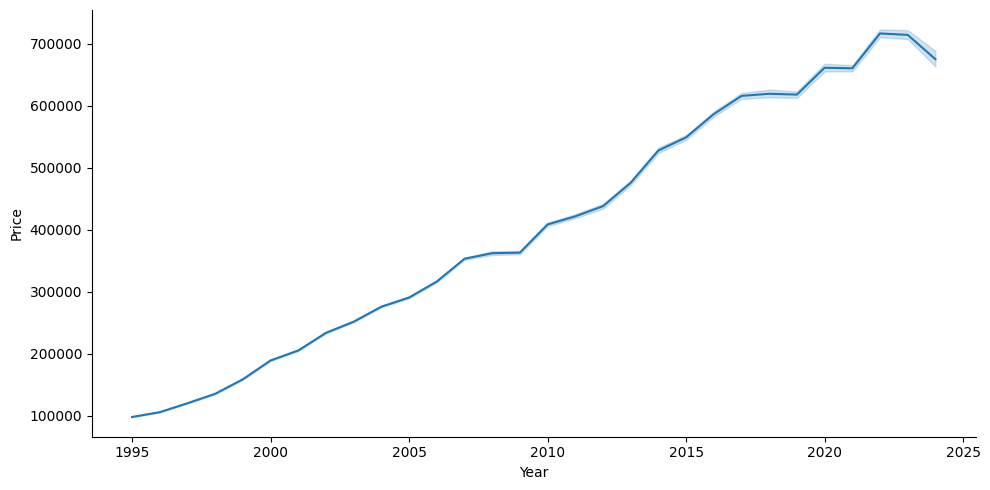

In [ ]:
sns.relplot(kind = 'line', data = hp, x = 'Year', y = 'Price', aspect = 2);

- Transactions distribution per <code>Property Type</code> (D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes) for London

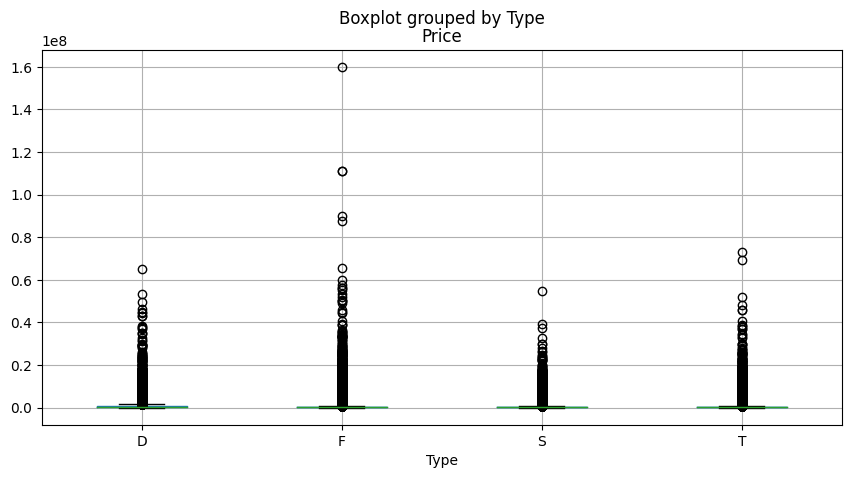

In [ ]:
hp.boxplot(column = 'Price', by = 'Type', figsize = (10,5));

- <code>Price</code> distribution for London

<Axes: xlabel='Price'>

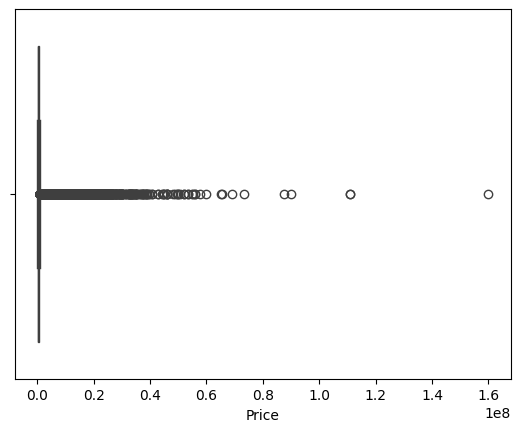

In [ ]:
sns.boxplot(data = hp, x = 'Price')

- Group median price with the year for London

In [ ]:
london_price_year_type_df = hp.groupby(['Type', 'Year'], as_index = False)['Price'].median()


- Median price distribution per year in London

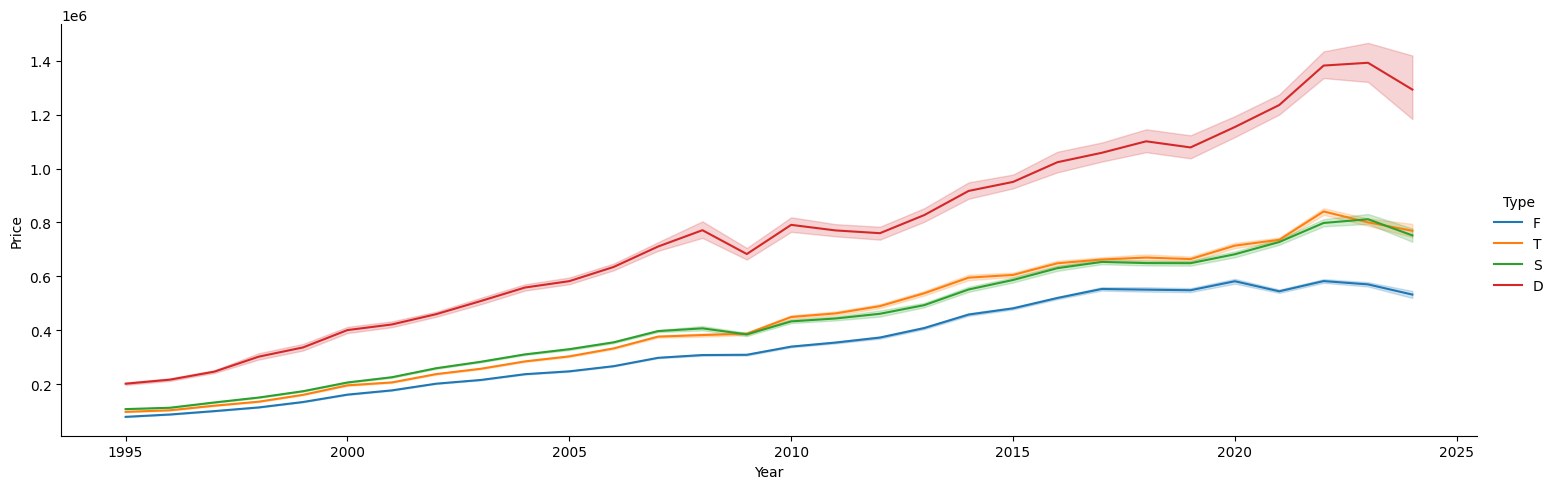

In [ ]:
sns.relplot(kind = 'line', data = hp,
            x = 'Year', y = 'Price', hue = 'Type', aspect = 3);

- Top 10 most valued Distrct on basis of investments done

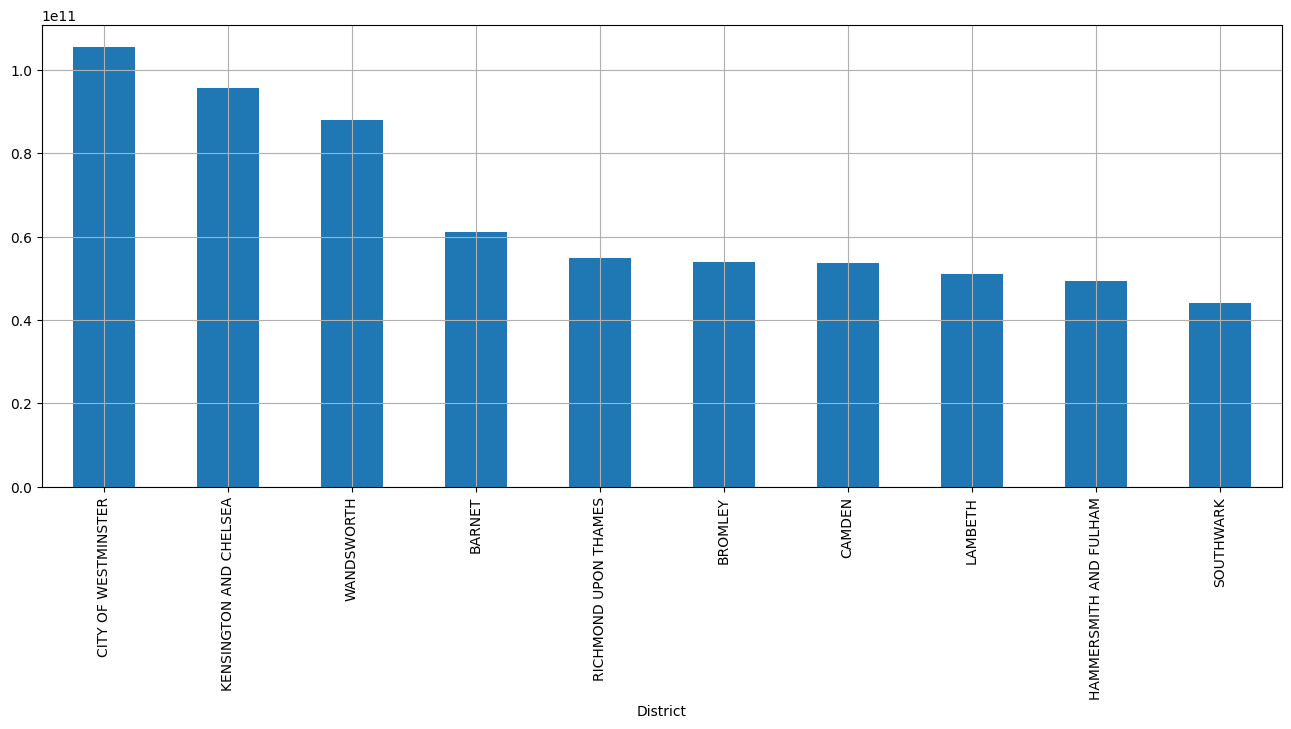

In [ ]:
hp.groupby(hp['District'])['Price'].sum().sort_values(ascending = False)[:10].plot(
    kind = "bar",grid = True, figsize = (16,6));

- Top 10 most valued District on basis of investments done (median value)

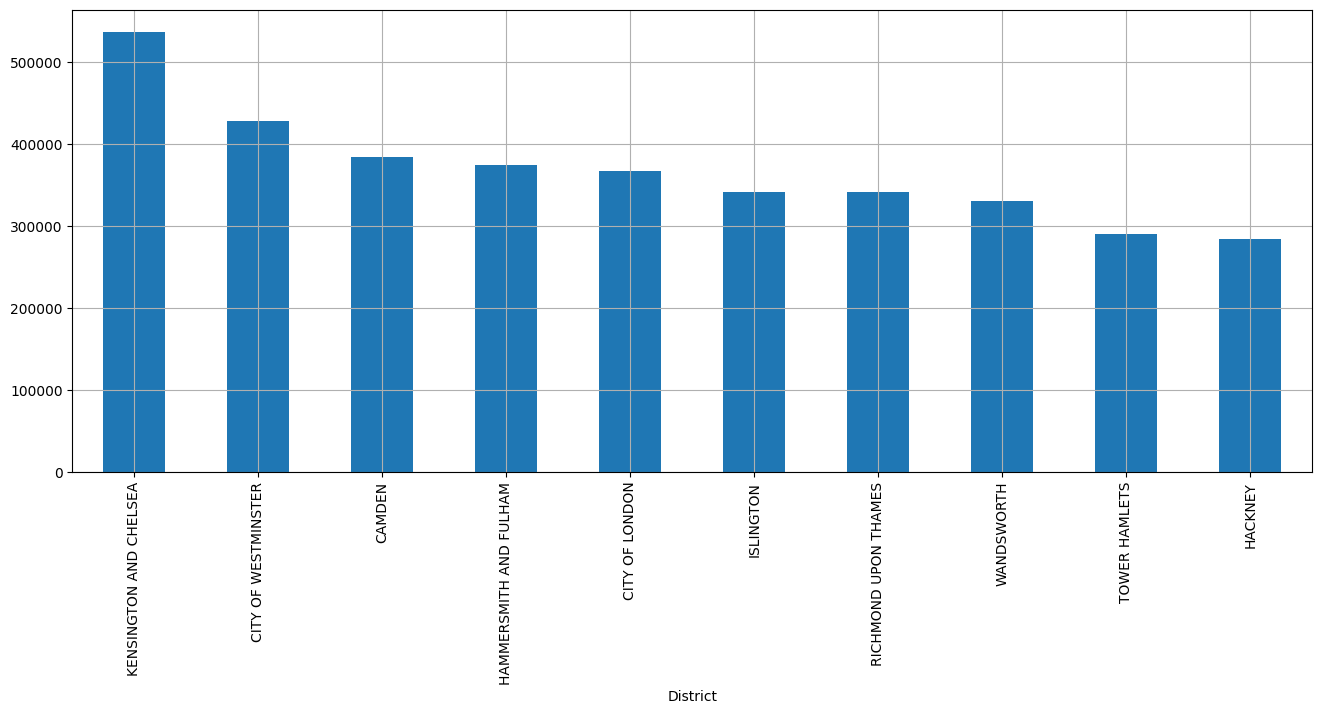

In [ ]:
hp.groupby(hp['District'])['Price'].median().sort_values(ascending = False)[:10].plot(
    kind = "bar",grid = True, figsize = (16,6));

- List of new investements that were done in 2017

In [ ]:
hp_2017 = hp[hp['Year'] == 2017].copy()

hp_2017['month'] = hp_2017['Date'].dt.month

hp_2017_price_per_month = hp_2017.groupby(['Type','month'], as_index=False)['Price'].median()

- Distribution of investments done in the first 6 months in 2017 by <code>Property Type</code>

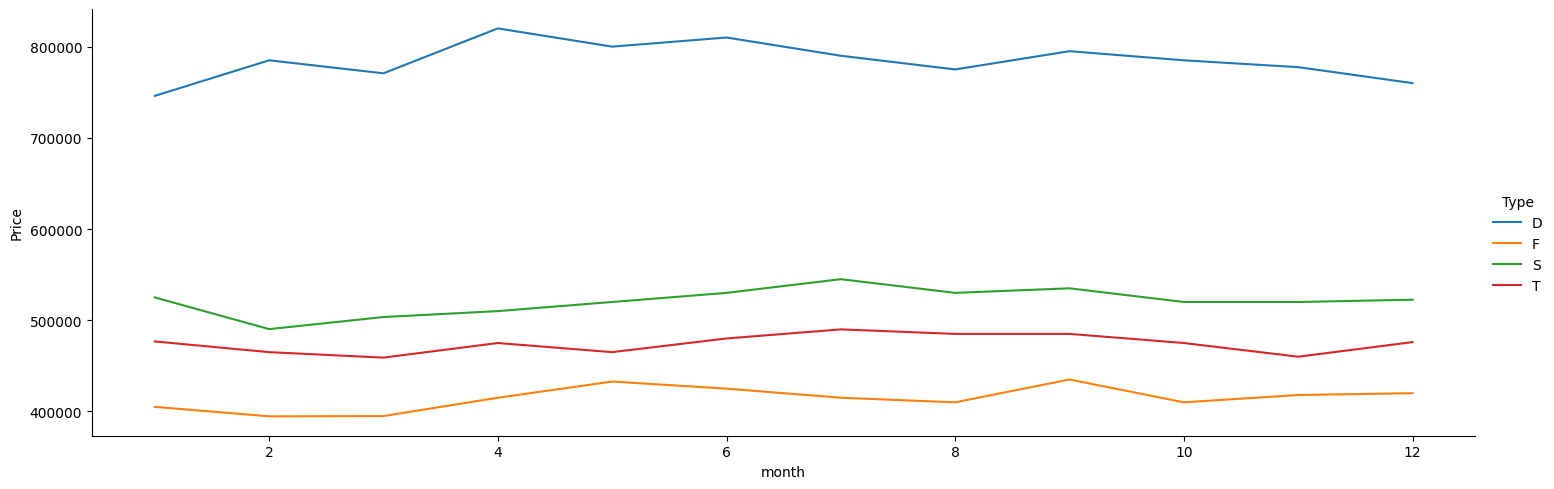

In [ ]:
sns.relplot(kind='line', data = hp_2017_price_per_month, x = 'month', y = 'Price', hue = 'Type', aspect = 3);

- A comparison of the last year (2017) and 10 years ago (2007)

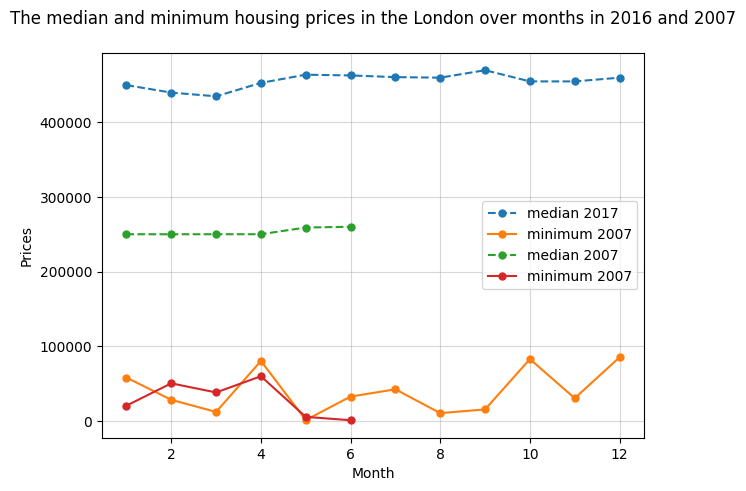

In [ ]:
hp_2007 = hp[hp['Year'] == 2007].copy()

hp_2007['month'] = hp_2007['Date'].apply(lambda x: x.month)

hp_2007 = hp_2007[hp_2007['month'].isin(list(range(1,7)))]

fig, ax = plt.subplots(figsize = (7,5))

ax.plot(hp_2017.groupby('month')['Price'].median(),
        label='median 2017', linestyle = 'dashed',marker = 'o', markersize = 5);

ax.plot(hp_2017.groupby('month')['Price'].min(),
        label = 'minimum 2007', marker = 'o', markersize = 5);

ax.plot(hp_2007.groupby('month')['Price'].median(),
        label = 'median 2007',linestyle = 'dashed', marker = 'o', markersize = 5);

ax.plot(hp_2007.groupby('month')['Price'].min(),
        label = 'minimum 2007', marker = 'o', markersize = 5);

ax.set(xlabel = 'Month',
       ylabel = 'Prices',
       title = "The median and minimum housing prices in the London over months in 2016 and 2007\n")

plt.grid(True, alpha = 0.5)

ax.legend();

- List of District having max. growth in housing transation from 2007 to 2017

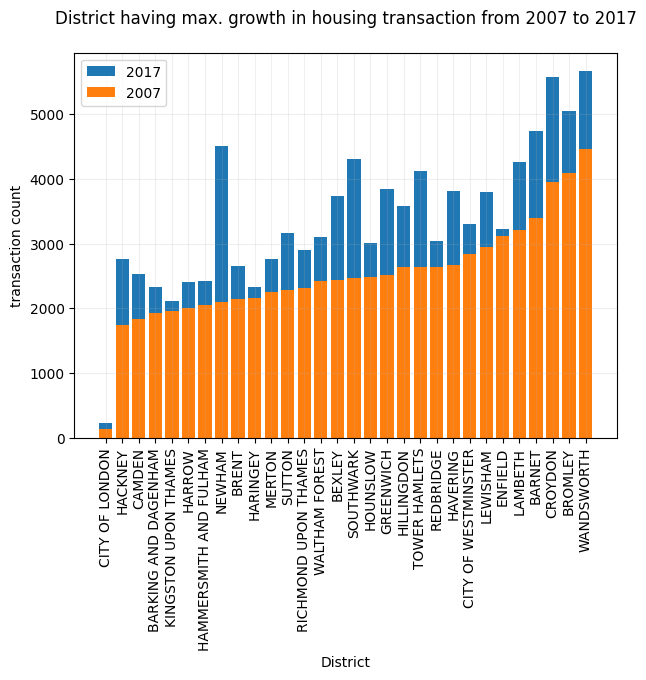

In [ ]:
max_g_1 = hp_2017.groupby(['District'], as_index = False)['Date'].count()
max_g_2 = hp_2007.groupby(['District'], as_index = False)['Date'].count()

max_g_m = pd.merge(max_g_1, max_g_2, how = 'left', on = 'District')

max_g_m['growth'] = max_g_m['Date_x'] - max_g_m['Date_y']

gdf_g = max_g_m[max_g_m.growth > 0].sort_values(by='growth', ascending = False)

graph_df = gdf_g[gdf_g['growth'] > 5].sort_values(by = 'Date_y')

fig, ax = plt.subplots(figsize=(7, 5))

ax.bar(graph_df['District'],graph_df['Date_x'], label = '2017');
ax.bar(graph_df['District'],graph_df['Date_y'], label = '2007');

ax.set(xlabel = 'District',
       ylabel = 'transaction count',
       title = "District having max. growth in housing transaction from 2007 to 2017\n")

ax.tick_params(axis = 'x', labelrotation = 90)

plt.grid(True, alpha = 0.2)

ax.legend();

<h1>4. Data cleansing - PART 2</h1>

- Drop <code>Date</code> column

In [ ]:
hp.drop(columns = 'Date', axis = 1, inplace = True)

- Show first five columns

In [ ]:
hp.head()

,Price,Type,Street,Town/City,District,County,Date,Year,Month
0,121250,F,WOODSIDE GRANGE ROAD,LONDON,BARNET,GREATER LONDON,1995-05-19,1995,5
1,128500,T,TRENTHAM STREET,LONDON,WANDSWORTH,GREATER LONDON,1995-03-01,1995,3
2,157500,S,LADY MARGARET ROAD,LONDON,ISLINGTON,GREATER LONDON,1995-03-17,1995,3
3,110995,F,PRIORY GROVE,LONDON,LAMBETH,GREATER LONDON,1995-11-09,1995,11
4,180000,F,ABBEY ROAD,LONDON,CITY OF WESTMINSTER,GREATER LONDON,1995-11-16,1995,11


- Apply One-hot encoding on <code>Property Type</code>

In [ ]:
property_types = ("T", "S", "D", "F")
enc_df = pd.DataFrame(hp, columns = ['Type'])

dum_df = pd.get_dummies(hp, columns = ["Type"], prefix = ["Type_is_"] )

hp = enc_df.join(dum_df)

hp.drop(columns = 'Type', axis = 1, inplace = True)

hp

,Price,Street,Town/City,District,County,Date,Year,Month,Type_is__D,Type_is__F,Type_is__S,Type_is__T
0,121250,WOODSIDE GRANGE ROAD,LONDON,BARNET,GREATER LONDON,1995-05-19,1995,5,False,True,False,False
1,128500,TRENTHAM STREET,LONDON,WANDSWORTH,GREATER LONDON,1995-03-01,1995,3,False,False,False,True
2,157500,LADY MARGARET ROAD,LONDON,ISLINGTON,GREATER LONDON,1995-03-17,1995,3,False,False,True,False
3,110995,PRIORY GROVE,LONDON,LAMBETH,GREATER LONDON,1995-11-09,1995,11,False,True,False,False
4,180000,ABBEY ROAD,LONDON,CITY OF WESTMINSTER,GREATER LONDON,1995-11-16,1995,11,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3737205,3000000,KENSINGTON CHURCH STREET,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,2024-01-19,2024,1,False,False,False,True
3737206,580000,CAMBRIDGE HEATH ROAD,LONDON,TOWER HAMLETS,GREATER LONDON,2024-01-30,2024,1,False,True,False,False
3737207,425000,DALLINGER ROAD,LONDON,LEWISHAM,GREATER LONDON,2024-01-31,2024,1,False,False,True,False
3737208,490000,BOUNDARY ROAD,LONDON,CAMDEN,GREATER LONDON,2024-01-25,2024,1,False,False,False,True


- Calculate <code>Price</code> mean and median

In [ ]:
price_mean = hp["Price"].mean()
price_median = hp["Price"].median()

print('Mean:', price_mean)
print("Median:", price_median)

Mean: 368549.41933035664
Median: 249995.0


- Describe <code>Price</code>

In [ ]:


hp["Price"].describe()

,Price
count,3.668251e+06
mean,3.685494e+05
std,5.832552e+05
min,1.000000e+00
25%,1.480000e+05
50%,2.499950e+05
75%,4.250000e+05
max,1.600000e+08


- Check is <code>Price</code> records skewed

In [ ]:
hp["Price"].skew()

30.60657710275915

<strong>The data is right skewed!</strong>

- Apply log transformation for positive skewness

In [ ]:
log_transform_price = np.log(hp["Price"])

hp['Price'] = log_transform_price

print('New skewness:', log_transform_price.skew())

New skewness: 0.09219286813734102


- Check for <code>Price</code> record skewness on plot

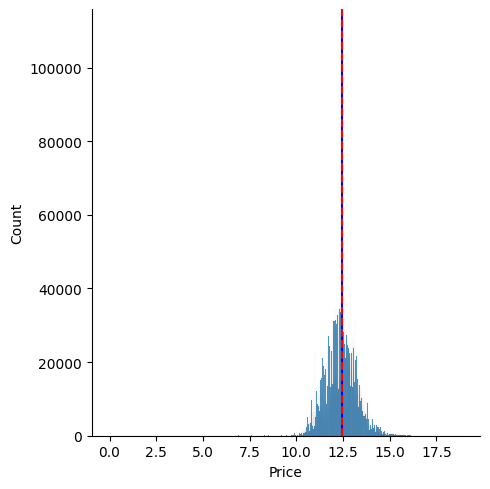

In [ ]:
hp_mean = hp["Price"].mean()
hp_median = hp["Price"].median()

sns.displot(data = hp, x = 'Price')
plt.axvline(x = hp_mean, color = 'blue')
plt.axvline(x = hp_median, color = "red", linestyle = '--')

- Price distribution

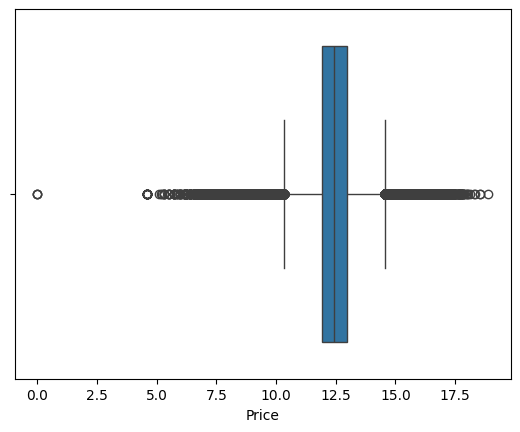

In [ ]:
sns.boxplot(data = hp, x = 'Price');

- Initialize outliers boundaries

In [ ]:
lower = 5.2
higher = 18.5

In [ ]:
hp.count()

,0
Price,3668251
Street,3668251
Town/City,3668251
District,3668251
County,3668251
Date,3668251
Year,3668251
Month,3668251
Type_is__D,3668251
Type_is__F,3668251


In [ ]:
price_outliers_below = hp.loc[hp['Price'] < lower]
price_outliers_abow = hp.loc[hp['Price'] > higher]

print(price_outliers_below['Price'].count(), "entries having 'Price' value lower than ", lower)
print(price_outliers_abow['Price'].count(), "entries having 'Price' value greater than", higher)

21 entries having 'Price' value lower than  5.2
3 entries having 'Price' value greater than 18.5


In [ ]:
hp["Price"] = hp["Price"].parallel_apply(lambda x: lower if x < lower else x)
hp["Price"] = hp["Price"].fillna(price_mean)

hp["Price"] = hp["Price"].parallel_apply(lambda x: higher if x > higher else x)
hp["Price"] = hp["Price"].fillna(price_mean)

price_outliers_below = hp.loc[hp['Price'] < lower]
price_outliers_abow = hp.loc[hp['Price'] > higher]

print(price_outliers_below['Price'].count(), "entries having 'Price' value lower than ", lower)
print(price_outliers_abow['Price'].count(), "entries having 'Price' value greater than ", lower)

0 entries having 'Price' value lower than  5.2
0 entries having 'Price' value greater than  5.2


- Price distribution after dealing with outliers

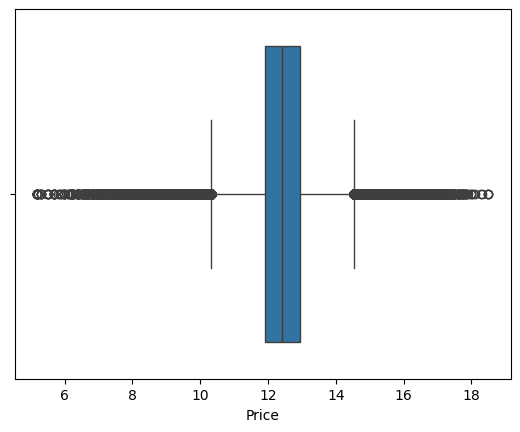

In [ ]:
sns.boxplot(data = hp, x = 'Price');

<h3>4.1. Prepare data for Linear Regression</h3>

- Instantiate dataset

In [ ]:
lin_df = hp.copy()

lin_df.head()

,Price,Street,Town/City,District,County,Date,Year,Month,Type_is__D,Type_is__F,Type_is__S,Type_is__T
0,11.705610,WOODSIDE GRANGE ROAD,LONDON,BARNET,GREATER LONDON,1995-05-19,1995,5,False,True,False,False
1,11.763684,TRENTHAM STREET,LONDON,WANDSWORTH,GREATER LONDON,1995-03-01,1995,3,False,False,False,True
2,11.967181,LADY MARGARET ROAD,LONDON,ISLINGTON,GREATER LONDON,1995-03-17,1995,3,False,False,True,False
3,11.617240,PRIORY GROVE,LONDON,LAMBETH,GREATER LONDON,1995-11-09,1995,11,False,True,False,False
4,12.100712,ABBEY ROAD,LONDON,CITY OF WESTMINSTER,GREATER LONDON,1995-11-16,1995,11,False,True,False,False


In [ ]:
# Check for case sensitivity
print(lin_df.columns)

lin_df = lin_df.drop(['Date '], axis=1)


Index(['Price', 'Street', 'Town/City', 'District', 'County', 'Date ', 'Year',
       'Month', 'Type_is__D', 'Type_is__F', 'Type_is__S', 'Type_is__T'],
      dtype='object')


- Encode other categorical data

In [ ]:
lin_df['Town/City'] = lin_df['Town/City'].factorize()[0].astype('float32')
lin_df['District'] = lin_df['District'].factorize()[0].astype('float32')
lin_df['County'] = lin_df['County'].factorize()[0].astype('float32')
lin_df['Street'] = lin_df['Street'].factorize()[0].astype('float32')

lin_df

,Price,Street,Town/City,District,County,Year,Month,Type_is__D,Type_is__F,Type_is__S,Type_is__T
0,11.705610,0.0,0.0,0.0,0.0,1995,5,False,True,False,False
1,11.763684,1.0,0.0,1.0,0.0,1995,3,False,False,False,True
2,11.967181,2.0,0.0,2.0,0.0,1995,3,False,False,True,False
3,11.617240,3.0,0.0,3.0,0.0,1995,11,False,True,False,False
4,12.100712,4.0,0.0,4.0,0.0,1995,11,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3737205,14.914123,1836.0,0.0,19.0,0.0,2024,1,False,False,False,True
3737206,13.270783,673.0,0.0,10.0,0.0,2024,1,False,True,False,False
3737207,12.959844,10112.0,0.0,16.0,0.0,2024,1,False,False,True,False
3737208,13.102161,6101.0,0.0,29.0,0.0,2024,1,False,False,False,True


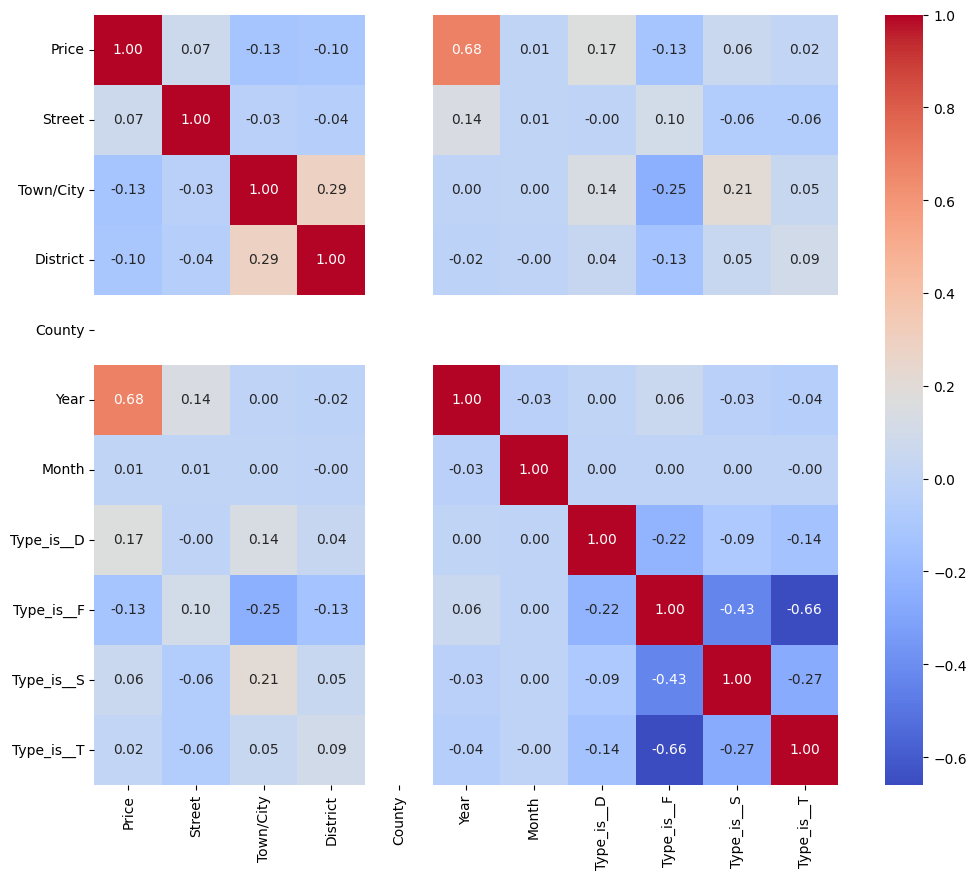

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = lin_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


- Seggregate independent variables

In [ ]:
feat_cols = ['District','Year',]

In [ ]:
X = lin_df.drop(['Price'], axis=1)  # Drop the target variable 'Price'
y = lin_df['Price']

- Divide variables to dependent and independent

In [ ]:
X = lin_df[feat_cols]
y = lin_df['Price']


- Split the data into training and testing sets (75% training, 25% testing)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

- Summarize the shape of the training dataset

In [ ]:
print(X_train.shape, y_train.shape)

(2751188, 10) (2751188,)


#linear regression

In [ ]:
# Now, you can fit your model without getting the errorfrom sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.31978847826825113
R² Score: 0.5501701549323801


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(normalized_X_train, y_train)

# Make predictions on the training set and the testing set
train_predictions = model.predict(normalized_X_train)
test_predictions = model.predict(X_test)


In [ ]:
# Calculate metrics for both the training and testing sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R²:", train_r2)
print("Testing R²:", test_r2)


Training MSE: 0.37809819917724813
Testing MSE: 1315278.3012160398
Training R²: 0.4694443324945161
Testing R²: -1850132.6810531153


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a set of parameters to test
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Create a Ridge regressor
ridge = Ridge()

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Evaluate on the testing data
best_ridge = grid_search.best_estimator_
test_predictions = best_ridge.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Best parameters:", grid_search.best_params_)
print("Testing MSE:", test_mse)
print("Testing R²:", test_r2)


Best parameters: {'alpha': 1}
Testing MSE: 0.3199665213903267
Testing R²: 0.5499197109187235


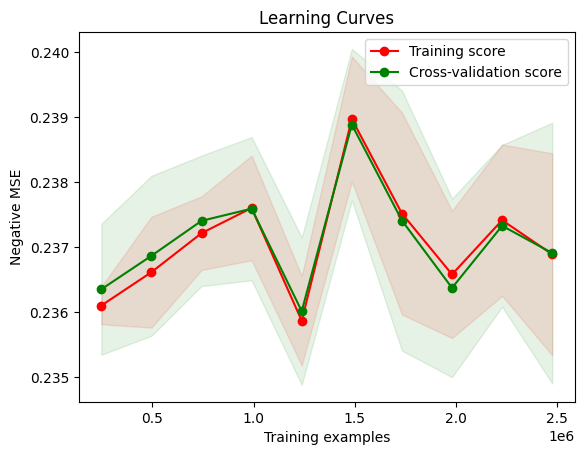

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, cv=10,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for train and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g",
         label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Negative MSE")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train the model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_regressor.predict(X_test)

# Calculate R² score
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression R² Score:", r2_lr)


Linear Regression R² Score: 0.5499197117286934


#DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Train the model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_regressor.predict(X_test)

# Calculate R² score
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Regressor R² Score:", r2_dt)


Decision Tree Regressor R² Score: 0.7140195332995704


#ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

# Train the ElasticNet model
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.1)
elastic_net.fit(X_train, y_train)

# Predict on the test set
y_pred_en = elastic_net.predict(X_test)

# Calculate and print the R² score
r2_en = r2_score(y_test, y_pred_en)
print(f"ElasticNet Regression R² Score: {r2_en:.3f}")


ElasticNet Regression R² Score: 0.470


#Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Train the Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test)

# Calculate and print the R² score
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression R² Score: {r2_lasso:.3f}")


Lasso Regression R² Score: 0.469


#lightgbm

In [ ]:
!pip install lightgbm
import lightgbm as lgb
from sklearn.metrics import r2_score

# Train the LightGBM Regressor
lgb_regressor = lgb.LGBMRegressor(random_state=789)
lgb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_regressor.predict(X_test)

# Calculate and print the R² score
r2_lgb = r2_score(y_test, y_pred_lgb)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.7 MB/s eta 0:00:00
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 2751188, number of used features: 2
[LightGBM] [Info] Start training from score 12.428178


In [ ]:
print(f"LightGBM Regressor R² Score: {r2_lgb:.3f}")

LightGBM Regressor R² Score: 0.620


#xgboost

In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import r2_score

# Train the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=1100, seed=55)
xgb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_regressor.predict(X_test)

# Calculate and print the R² score
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Regressor R² Score: {r2_xgb:.3f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.8 MB/s eta 0:00:00
XGBoost Regressor R² Score: 0.621


#Comparison of Regression Models R² Scores

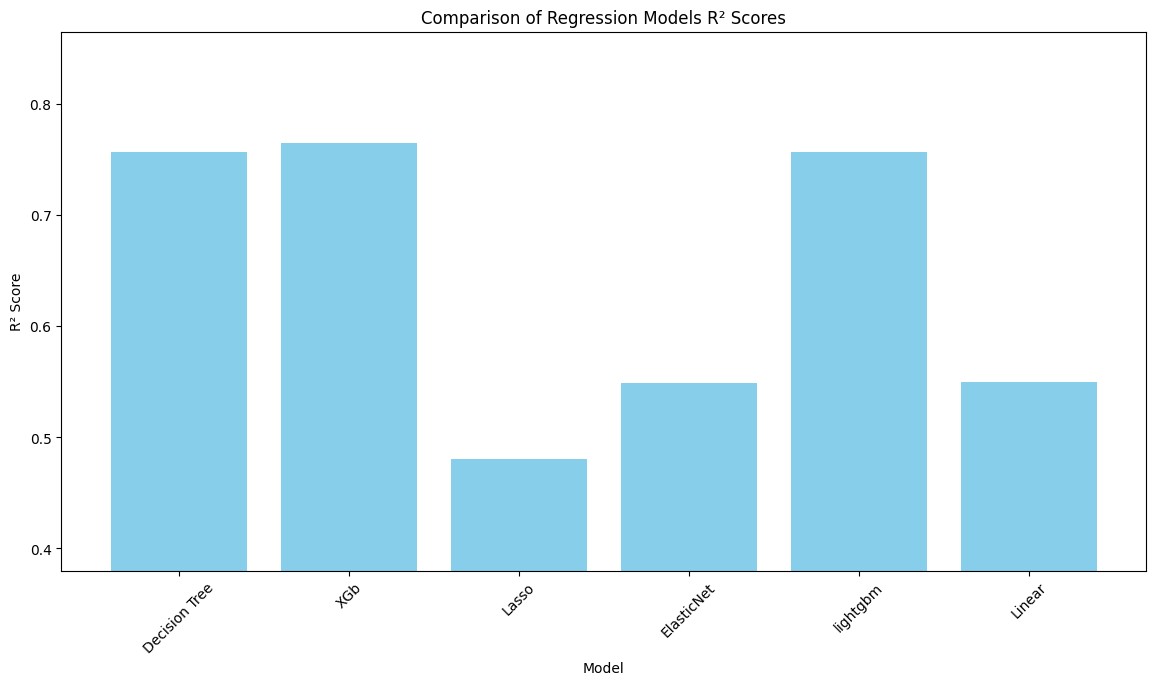

In [ ]:
import matplotlib.pyplot as plt

# Names of models
model_names = ['Decision Tree', 'XGb',  'Lasso', 'ElasticNet', 'lightgbm', 'Linear']

# R² scores
r2_scores = [r2_dt, r2_xgb, r2_lasso, r2_en, r2_lgb ,r2_lr]

# Creating the bar plot
plt.figure(figsize=(14, 7))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Comparison of Regression Models R² Scores')
plt.ylim(min(r2_scores) - 0.1, max(r2_scores) + 0.1)  # Adjust y-axis limits for better visualization
plt.xticks(rotation=45)
plt.show()
